In [1]:
# tensorflow 라이브러리
import tensorflow as tf

# numpy 라이브러리
import numpy as np

# 데이터 시각화하는 라이브러리
import matplotlib.pyplot as plt

# os 모듈
import os

# 파일과 디렉토리 경로 패턴 매칭에 사용
import glob

# 이미지 처리와 조작을 위한 라이브러리
from PIL import Image

# 데이터를 Training Data와 Test Data로 나누어주는 라이브러리
from sklearn.model_selection import train_test_split

# 모델 정의하고 구성하는 데 사용되는 클래스
from tensorflow.keras.models import Model

# ResNet 모델
from tensorflow.keras.applications import ResNet50

# 데이터 전처리와 해석을 위한 함수
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# 필요한 층들을 가지고 있는 layers 라이브러리
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# optimizer를 위한 라이브러리 (Adam)
from tensorflow.keras.optimizers import Adam

# 조기 종료를 구현하기 위한 콜백 클래스
from tensorflow.keras.callbacks import EarlyStopping

# 손실 함수
from tensorflow.keras.losses import CategoricalCrossentropy

In [2]:
# 데이터 가져오기 $ 데이터 전처리

data_path = "./Dataset/Train"
categories = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "Nothing", "Space"]
classes = len(categories)

w = 224
h = 224

pixels = h * w * 3

x = []
t = []
count = 100

for i, j in enumerate(categories):
    
    # One-hot Encoding
    label = [0 for k in range(classes)]
    label[i] = 1
    
    img_path = data_path + "/" + j
    files = glob.glob(img_path + "/*.jpg")[:count]
    print(j, "파일 길이 : ", len(files))
    
    # 이미지 전처리
    for k, f in enumerate(files):
  
        img = Image.open(f)
        img = img.convert("RGB")   # RGB 채널로 변환
        img = img.resize((w, h))   # 이미지 크기 조정
        data = np.asarray(img)   # numpy 배열로 변환
        x.append(data)
        t.append(label)
          
x = np.array(x)
t = np.array(t)

print('데이터 준비 및 전처리 완료!')

A 파일 길이 :  100
B 파일 길이 :  100
C 파일 길이 :  100
D 파일 길이 :  100
E 파일 길이 :  100
F 파일 길이 :  100
G 파일 길이 :  100
H 파일 길이 :  100
I 파일 길이 :  100
J 파일 길이 :  100
K 파일 길이 :  100
L 파일 길이 :  100
M 파일 길이 :  100
N 파일 길이 :  100
O 파일 길이 :  100
P 파일 길이 :  100
Q 파일 길이 :  100
R 파일 길이 :  100
S 파일 길이 :  100
T 파일 길이 :  100
U 파일 길이 :  100
V 파일 길이 :  100
W 파일 길이 :  100
X 파일 길이 :  100
Y 파일 길이 :  100
Z 파일 길이 :  100
Nothing 파일 길이 :  100
Space 파일 길이 :  100
데이터 준비 및 전처리 완료!


In [3]:
# Training Data와 Test Data로 나눠주기

x_train, x_test, t_train, t_test = train_test_split(x, t)
dataset_numpy = (x_train, x_test, t_train, t_test)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(2100, 224, 224, 3)
(2100, 28)
(700, 224, 224, 3)
(700, 28)


In [4]:
# 데이터 정규화

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
# 모델 로드

base_model = ResNet50(include_top = False, weights = 'imagenet', 
                   input_shape = (224, 224, 3))

In [6]:
# 추가적인 레이어 생성

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(150, activation = 'relu')(x)
predictions = Dense(28, activation = 'softmax')(x)

In [7]:
# 전체 모델 정의

model = Model(inputs = base_model.input, outputs = predictions)

In [8]:
# 기존 모델 레이어 동결

for layer in base_model.layers:
    layer.trainable = False

In [9]:
# 모델 컴파일

model.compile(optimizer = Adam(), loss = CategoricalCrossentropy(), 
              metrics = ['accuracy'])

In [10]:
# Early Stopping 콜백

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, 
                               verbose = 1)

In [11]:
# 모델 학습

model.fit(x_train, t_train, batch_size = 32, epochs = 10, 
          validation_data = (x_test, t_test), callbacks = [early_stopping])

Epoch 1/10
66/66 [==============================] - 104s 2s/step - loss: 3.3672 - accuracy: 0.0352 - val_loss: 3.3360 - val_accuracy: 0.0414
Epoch 2/10
66/66 [==============================] - 100s 2s/step - loss: 3.3309 - accuracy: 0.0414 - val_loss: 3.3079 - val_accuracy: 0.0314
Epoch 3/10
66/66 [==============================] - 101s 2s/step - loss: 3.3007 - accuracy: 0.0538 - val_loss: 3.2928 - val_accuracy: 0.0400
Epoch 4/10
66/66 [==============================] - 101s 2s/step - loss: 3.2659 - accuracy: 0.0843 - val_loss: 3.2380 - val_accuracy: 0.1471
Epoch 5/10
66/66 [==============================] - 100s 2s/step - loss: 3.2251 - accuracy: 0.1148 - val_loss: 3.1914 - val_accuracy: 0.1357
Epoch 6/10
66/66 [==============================] - 101s 2s/step - loss: 3.1668 - accuracy: 0.1181 - val_loss: 3.1263 - val_accuracy: 0.1700
Epoch 7/10
66/66 [==============================] - 101s 2s/step - loss: 3.1016 - accuracy: 0.1476 - val_loss: 3.0735 - val_accuracy: 0.1171
Epoch 8/10
66

In [12]:
# 모델 평가

loss, accuracy = model.evaluate(x_test, t_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

22/22 [==============================] - 25s 1s/step - loss: 2.7726 - accuracy: 0.2571
Test Loss: 2.772643804550171
Test Accuracy: 0.2571428716182709


1/1 [==============================] - 1s 763ms/step
분류 : T/ 정답 : I


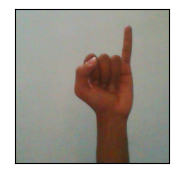

1/1 [==============================] - 0s 82ms/step
분류 : S/ 정답 : S


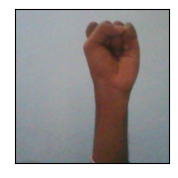

1/1 [==============================] - 0s 80ms/step
분류 : J/ 정답 : Q


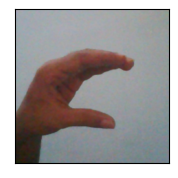

1/1 [==============================] - 0s 80ms/step
분류 : C/ 정답 : C


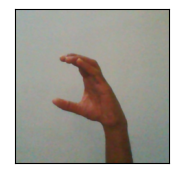

1/1 [==============================] - 0s 83ms/step
분류 : C/ 정답 : D


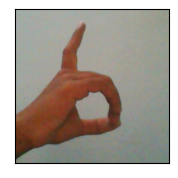

1/1 [==============================] - 0s 82ms/step
분류 : N/ 정답 : X


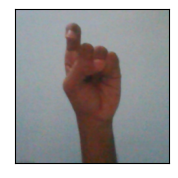

1/1 [==============================] - 0s 78ms/step
분류 : Nothing/ 정답 : B


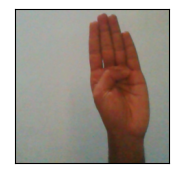

1/1 [==============================] - 0s 80ms/step
분류 : J/ 정답 : R


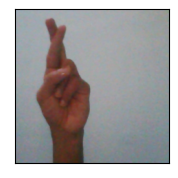

1/1 [==============================] - 0s 76ms/step
분류 : C/ 정답 : C


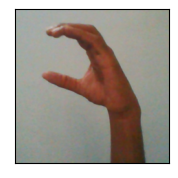

1/1 [==============================] - 0s 79ms/step
분류 : K/ 정답 : I


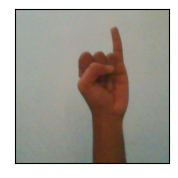

In [13]:
# 10개의 test data로 성능 확인

categories = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", 
              "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "Nothing", 
              "Space"]

width = 224
height = 224
channel = 3

for i in range(10, 20):
    plt.figure(figsize = (2, 2))
    
    output = model.predict(x_test[i].reshape(1, width, height, channel))
    
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].reshape(width, height, channel), cmap = 'gray')
    
    print('분류 : ' + categories[np.argmax(output)] + '/ 정답 : ' 
          + categories[np.argmax(t_test[i])])
    plt.show()